In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    OneHotEncoder
)
from sklearn.compose import ColumnTransformer

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette ={"No": "C0", "Yes": "C1"}

In [2]:
df = pd.read_csv('heart.csv').drop_duplicates()

cols = df.columns
for col in cols:
    if df[col].dtype == object:
        df[col] = df[col].astype('string')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df[df['Oldpeak']<0].count()

Age               13
Sex               13
ChestPainType     13
RestingBP         13
Cholesterol       13
FastingBS         13
RestingECG        13
MaxHR             13
ExerciseAngina    13
Oldpeak           13
ST_Slope          13
HeartDisease      13
dtype: int64

In [4]:
print(list(df['ChestPainType'].unique()))
print(list(df['RestingECG'].unique()))
print(list(df['Sex'].unique()))
print(list(df['ST_Slope'].unique()))
print(list(df['ExerciseAngina'].unique()))
print(list(df['FastingBS'].unique()))
print(list(df['HeartDisease'].unique()))

['ATA', 'NAP', 'ASY', 'TA']
['Normal', 'ST', 'LVH']
['M', 'F']
['Up', 'Flat', 'Down']
['N', 'Y']
[0, 1]
[0, 1]


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 93.2 KB


In [7]:
df.isna().sum()

#No missing data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
count = (df['Cholesterol'] == 0).sum()
print('Incorrect Cholesterol Values:',count)
count = (df['RestingBP'] == 0).sum()
print('Incorrect RestingBP Values:',count)

Incorrect Cholesterol Values: 172
Incorrect RestingBP Values: 1


In [9]:
df['Cholesterol'].replace(0, np.nan, inplace=True)
df['RestingBP'].replace(0, np.nan, inplace=True)
count = (df['Cholesterol'] == 0).sum()
print('Incorrect Cholesterol Values:',count)
count = (df['RestingBP'] == 0).sum()
print('Incorrect RestingBP Values:',count)
df.isna().sum()

Incorrect Cholesterol Values: 0
Incorrect RestingBP Values: 0


Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [10]:
df = df[df['RestingBP'].notna()]
df.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [11]:
df['Oldpeak'] = df['Oldpeak'].abs()

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

ohe = OneHotEncoder()

cat = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
transformer = ColumnTransformer(
                transformers=[
                ('cat', ohe, cat)],
                remainder='passthrough'
            )

transformer.fit(df)

df_trans = pd.DataFrame(transformer.transform(df), columns=transformer.get_feature_names_out())
df_trans.columns = df_trans.columns.str.replace(r'cat__', '')
df_trans.columns = df_trans.columns.str.replace(r'remainder__', '')
heart_disease_mapping = {'Yes': 1, 'No': 0}
df_trans = df_trans.replace({'HeartDisease': heart_disease_mapping})

# Split the data into two sets - one with missing values in the 'Cholesterol' column and another without
df_missing = df_trans[df_trans['Cholesterol'].isnull()]
df_not_missing = df_trans[~df_trans['Cholesterol'].isnull()]

# Define the features and target variable for the machine-learning model
X = df_not_missing.drop('Cholesterol', axis=1)
y = df_not_missing['Cholesterol']

# Fit a machine-learning model to the non-missing values in the 'Cholesterol' column
model = RandomForestRegressor()
model.fit(X, y)

# Use the fitted model to predict the missing values in the 'Cholesterol' column
df_missing_X = df_missing.drop('Cholesterol', axis=1)
df_missing_y = model.predict(df_missing_X)

# Replace the missing values in the 'Cholesterol' column with the predicted values
df.loc[df['Cholesterol'].isnull(), 'Cholesterol'] = df_missing_y

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

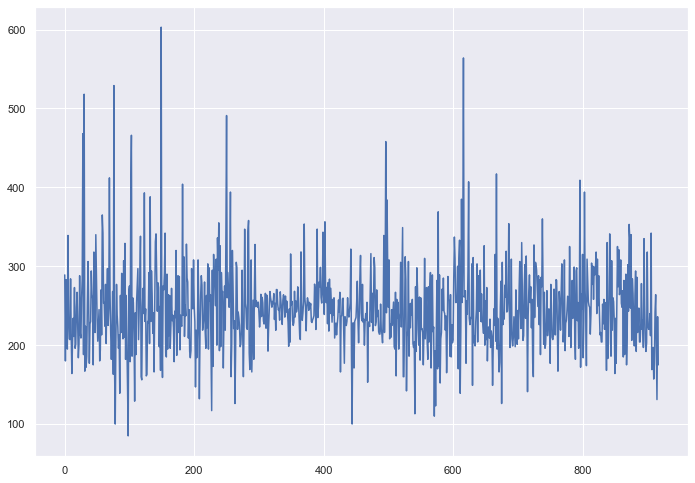

In [13]:
df['Cholesterol'].plot()

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


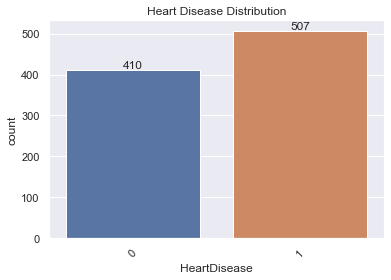

In [14]:
fig = plt.figure(figsize = (6,4))
ax = sns.countplot(df['HeartDisease'])
ax.bar_label(ax.containers[0])
plt.title('Heart Disease Distribution')
plt.xticks(rotation = 45)
plt.show()

#More people with heart disease in this dataset than not

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


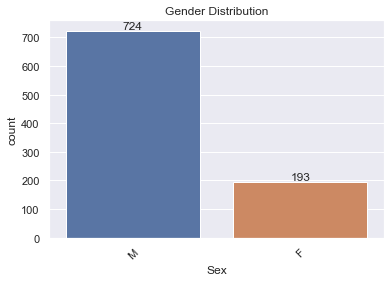

In [15]:
fig = plt.figure(figsize = (6,4))
ax = sns.countplot(df['Sex'])
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.xticks(rotation = 45)
plt.show()

#Significantly more males than females in this dataset

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


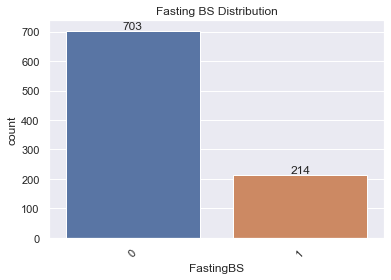

In [16]:
fig = plt.figure(figsize = (6,4))
ax = sns.countplot(df['FastingBS'])
ax.bar_label(ax.containers[0])
plt.title('Fasting BS Distribution')
plt.xticks(rotation = 45)
plt.show()

#More people with heart disease in this dataset than not

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


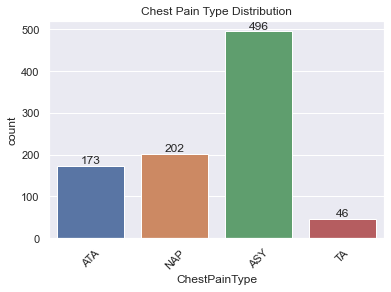

In [17]:
fig = plt.figure(figsize = (6,4))
ax = sns.countplot(df['ChestPainType'])
ax.bar_label(ax.containers[0])
plt.title('Chest Pain Type Distribution')
plt.xticks(rotation = 45)
plt.show()

#More people with heart disease in this dataset than not

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


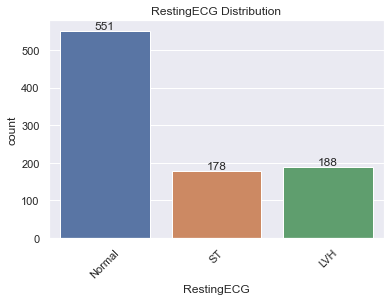

In [18]:
fig = plt.figure(figsize = (6,4))
ax = sns.countplot(df['RestingECG'])
ax.bar_label(ax.containers[0])
plt.title('RestingECG Distribution')
plt.xticks(rotation = 45)
plt.show()

#More people with heart disease in this dataset than not

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


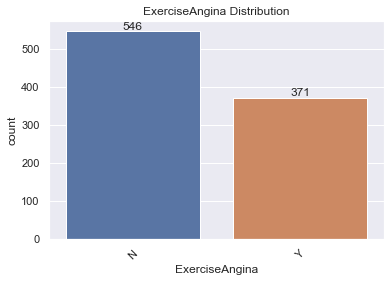

In [19]:
fig = plt.figure(figsize = (6,4))
ax = sns.countplot(df['ExerciseAngina'])
ax.bar_label(ax.containers[0])
plt.title('ExerciseAngina Distribution')
plt.xticks(rotation = 45)
plt.show()

#More people with heart disease in this dataset than not

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


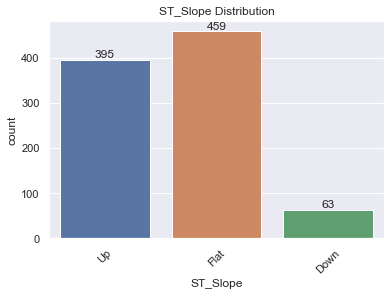

In [20]:
fig = plt.figure(figsize = (6,4))
ax = sns.countplot(df['ST_Slope'])
ax.bar_label(ax.containers[0])
plt.title('ST_Slope Distribution')
plt.xticks(rotation = 45)
plt.show()

#More people with heart disease in this dataset than not

In [21]:
ohe = OneHotEncoder()

cat = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
transformer = ColumnTransformer(
                transformers=[
                ('cat', ohe, cat)],
                remainder='passthrough'
            )

transformer.fit(df)

df_trans = pd.DataFrame(transformer.transform(df), columns=transformer.get_feature_names_out())
df_trans.columns = df_trans.columns.str.replace(r'cat__', '')
df_trans.columns = df_trans.columns.str.replace(r'remainder__', '')
df_trans

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,40.0,140.0,289.0,172.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,49.0,160.0,180.0,156.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,37.0,130.0,283.0,98.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,48.0,138.0,214.0,108.0,1.5,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,54.0,150.0,195.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,45.0,110.0,264.0,132.0,1.2,1.0
913,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,68.0,144.0,193.0,141.0,3.4,1.0
914,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,57.0,130.0,131.0,115.0,1.2,1.0
915,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,57.0,130.0,236.0,174.0,0.0,1.0


In [22]:
df_trans.isna().sum()

Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
FastingBS_0          0
FastingBS_1          0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
Age                  0
RestingBP            0
Cholesterol          0
MaxHR                0
Oldpeak              0
HeartDisease         0
dtype: int64

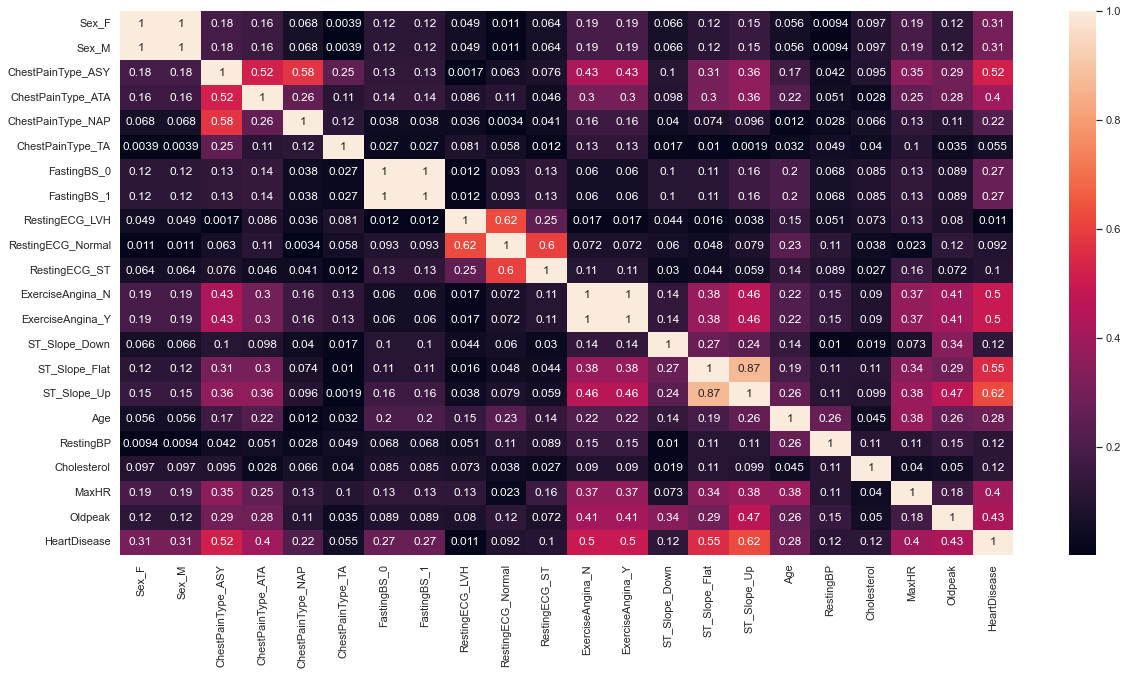

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(df_trans.corr(method = 'pearson').abs(),annot = True);

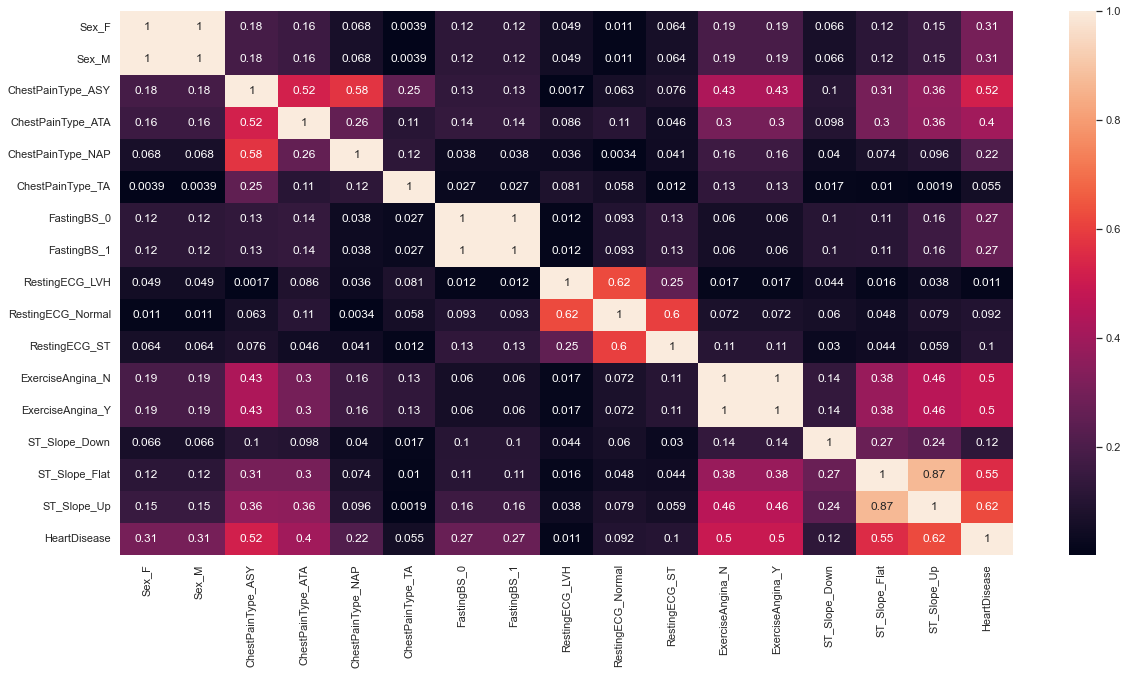

In [24]:
plt.figure(figsize = (20,10))
df_cats = df_trans.drop(columns = num)
sns.heatmap(df_cats.corr(method = 'pearson').abs(), annot = True);

In [25]:
df_cats.corr(method = 'pearson')['HeartDisease']

Sex_F               -0.305118
Sex_M                0.305118
ChestPainType_ASY    0.518339
ChestPainType_ATA   -0.401680
ChestPainType_NAP   -0.215311
ChestPainType_TA    -0.054591
FastingBS_0         -0.267994
FastingBS_1          0.267994
RestingECG_LVH       0.011174
RestingECG_Normal   -0.092452
RestingECG_ST        0.103067
ExerciseAngina_N    -0.495490
ExerciseAngina_Y     0.495490
ST_Slope_Down        0.122852
ST_Slope_Flat        0.553700
ST_Slope_Up         -0.621843
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

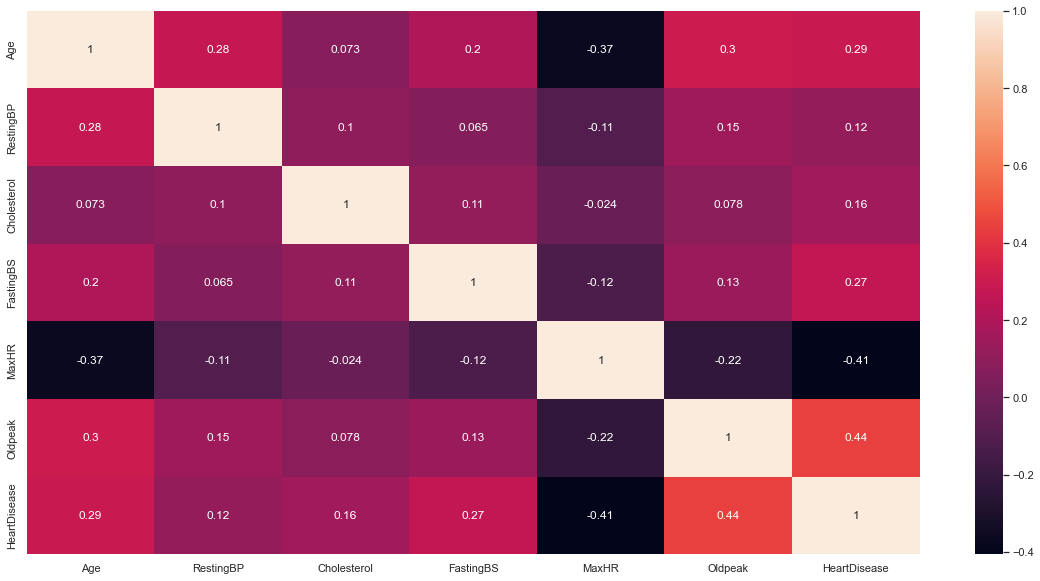

In [26]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(method = 'spearman'),annot = True);

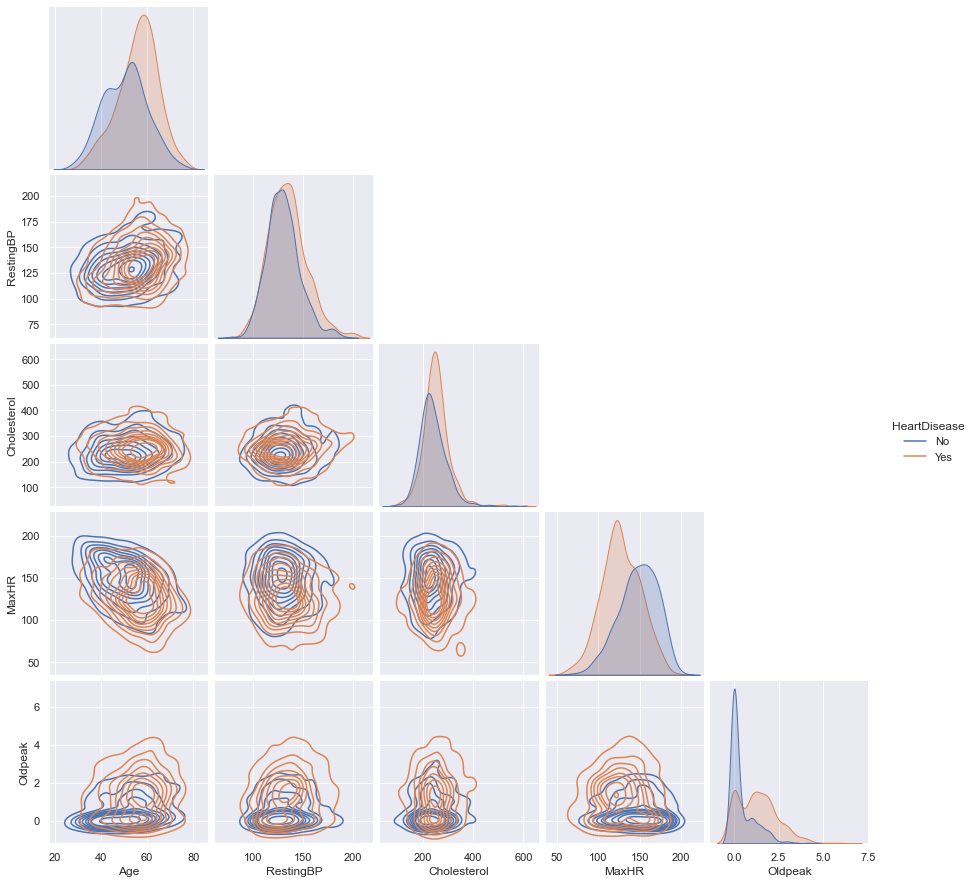

In [27]:
heart_disease_mapping = {1: 'Yes', 0: 'No'}
df = df.replace({'HeartDisease': heart_disease_mapping})

cat = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
sns.pairplot(data=df[num+['HeartDisease']], hue='HeartDisease', kind="kde", corner = True, palette = palette)

In [28]:
print('No CHD')
display(df[df['HeartDisease']=='Yes'].describe()['Cholesterol'])
print('Yes CHD')
df[df['HeartDisease']=='No'].describe()['Cholesterol']

No CHD


count    507.000000
mean     251.692465
std       54.293578
min      100.000000
25%      222.910000
50%      248.080000
75%      274.000000
max      603.000000
Name: Cholesterol, dtype: float64

Yes CHD


count    410.000000
mean     238.357024
std       54.197400
min       85.000000
25%      204.000000
50%      230.725000
75%      266.750000
max      564.000000
Name: Cholesterol, dtype: float64

No handles with labels found to put in legend.


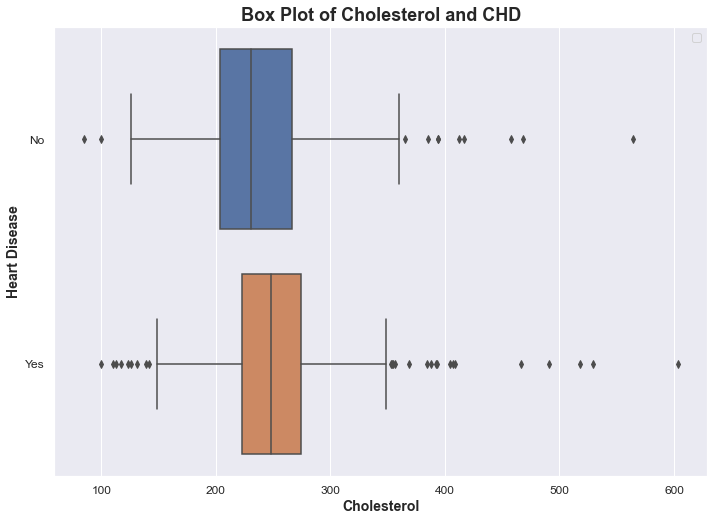

In [29]:
ax = sns.boxplot(data=df, x = 'Cholesterol', y='HeartDisease')
ax.set_title('Box Plot of Cholesterol and CHD', fontsize=18, fontweight='bold')
ax.set_xlabel('Cholesterol', fontsize=14, fontweight='bold')
ax.set_ylabel('Heart Disease', fontsize=14, fontweight='bold')

ax.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.show()


<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

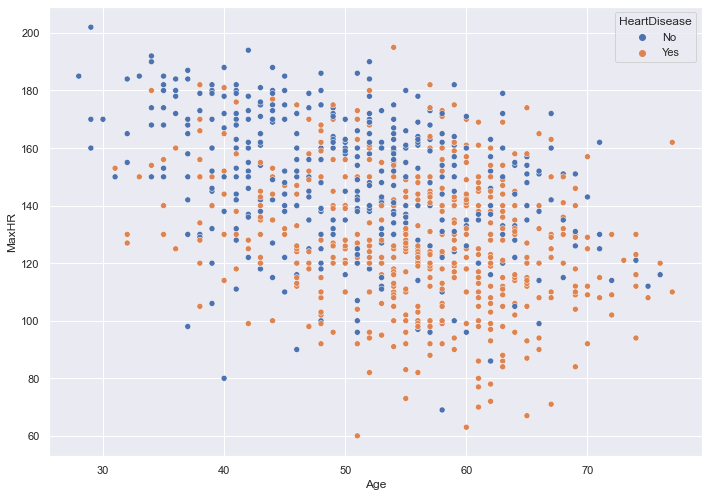

In [30]:
sns.scatterplot(x = 'Age', y = 'MaxHR', hue = 'HeartDisease', data = df)

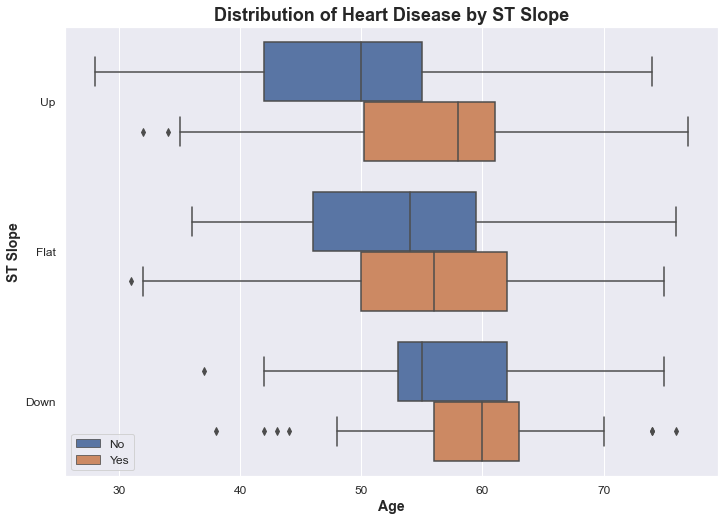

In [31]:
ax = sns.boxplot(data=df, x = 'Age', y='ST_Slope', hue='HeartDisease')
ax.set_title('Distribution of Heart Disease by ST Slope', fontsize=18, fontweight='bold')
ax.set_xlabel('Age', fontsize=14, fontweight='bold')
ax.set_ylabel('ST Slope', fontsize=14, fontweight='bold')

ax.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.show()


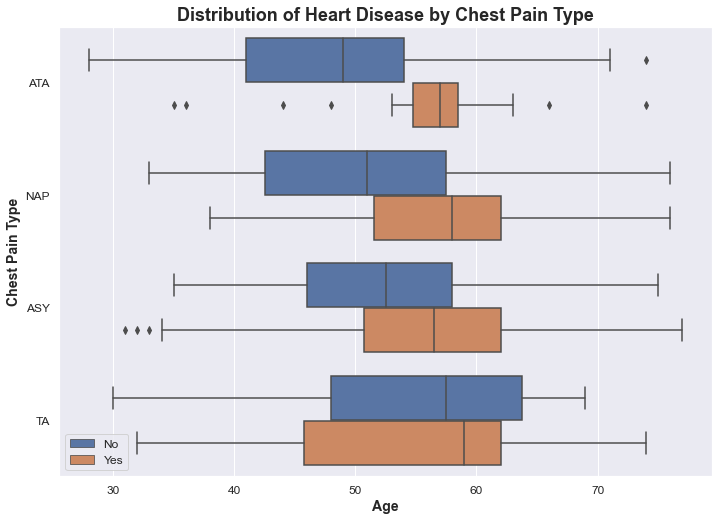

In [32]:
ax = sns.boxplot(data=df, x = 'Age', y='ChestPainType', hue='HeartDisease')
ax.set_title('Distribution of Heart Disease by Chest Pain Type', fontsize=18, fontweight='bold')
ax.set_xlabel('Age', fontsize=14, fontweight='bold')
ax.set_ylabel('Chest Pain Type', fontsize=14, fontweight='bold')

ax.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.show()


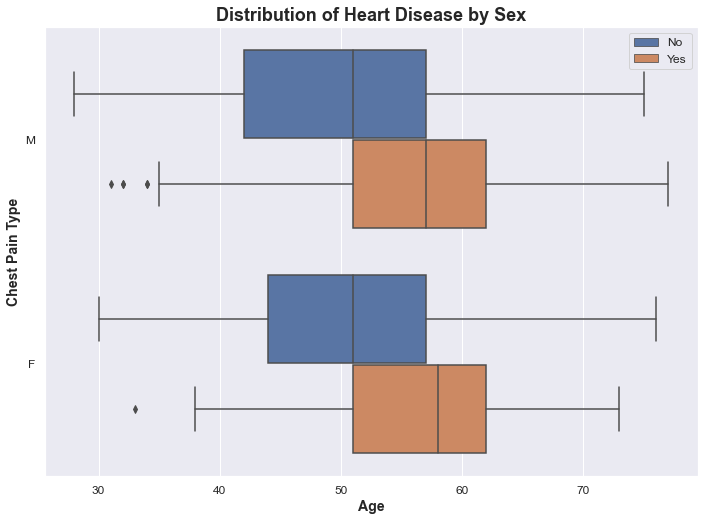

In [33]:
ax = sns.boxplot(data=df, x = 'Age', y='Sex', hue='HeartDisease')
ax.set_title('Distribution of Heart Disease by Sex', fontsize=18, fontweight='bold')
ax.set_xlabel('Age', fontsize=14, fontweight='bold')
ax.set_ylabel('Chest Pain Type', fontsize=14, fontweight='bold')

ax.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.show()


In [34]:
print(458/(267+458))
df_trans.groupby(['HeartDisease']).agg({'Sex_F':'sum', 'Sex_M':'sum'})

0.6317241379310344


,Sex_F,Sex_M
HeartDisease,,
0.0,143.0,267.0
1.0,50.0,457.0


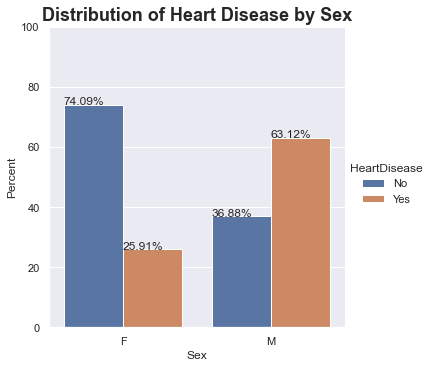

In [35]:
# df_trans.groupby(['HeartDisease']).agg({'Sex_F':'sum', 'Sex_M':'sum'})
x, y = 'Sex', 'HeartDisease'
df1 = df.groupby(['Sex'])['HeartDisease'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1)
g.ax.set_title('Distribution of Heart Disease by Sex', fontsize=18, fontweight='bold')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    

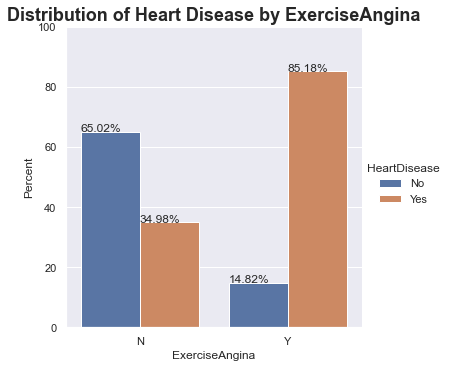

In [36]:
# df_trans.groupby(['HeartDisease']).agg({'Sex_F':'sum', 'Sex_M':'sum'})
x, y = 'ExerciseAngina', 'HeartDisease'
df1 = df.groupby(['ExerciseAngina'])['HeartDisease'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1)
g.ax.set_title('Distribution of Heart Disease by ExerciseAngina', fontsize=18, fontweight='bold')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    

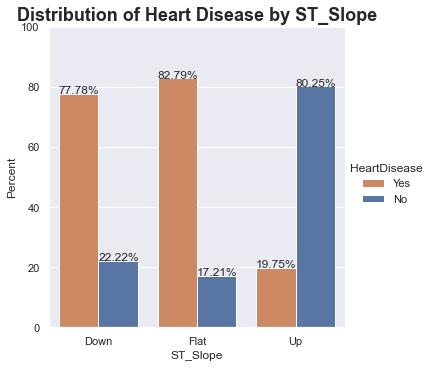

In [37]:
# df_trans.groupby(['HeartDisease']).agg({'Sex_F':'sum', 'Sex_M':'sum'})
palette ={"No": "C0", "Yes": "C1"}
x, y = 'ST_Slope', 'HeartDisease'
df1 = df.groupby(['ST_Slope'])['HeartDisease'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1, palette = palette)
g.ax.set_title('Distribution of Heart Disease by ST_Slope', fontsize=18, fontweight='bold')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    

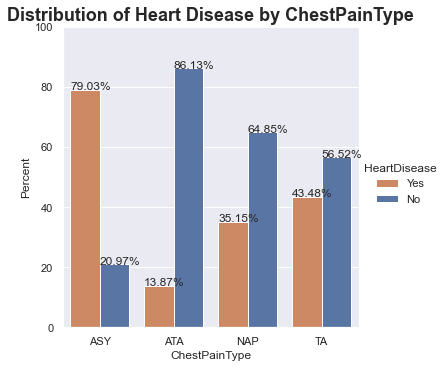

In [38]:
# df_trans.groupby(['HeartDisease']).agg({'Sex_F':'sum', 'Sex_M':'sum'})
x, y = 'ChestPainType', 'HeartDisease'
df1 = df.groupby(['ChestPainType'])['HeartDisease'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()
g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1, palette = palette)
g.ax.set_title('Distribution of Heart Disease by ChestPainType', fontsize=18, fontweight='bold')
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    

Text(0.5, 1.0, 'Distribution of Heart Disease by Age')

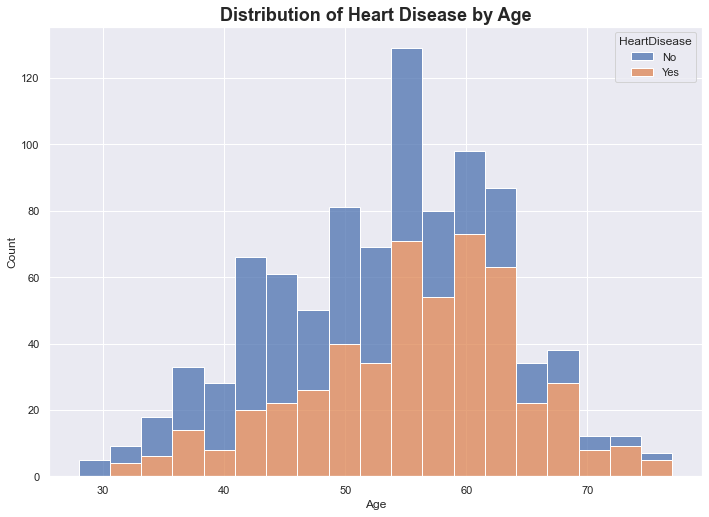

In [39]:
ax = sns.histplot(df, x='Age',hue='HeartDisease', multiple='stack')
ax.set_title('Distribution of Heart Disease by Age', fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Distribution of Heart Disease by MaxHR')

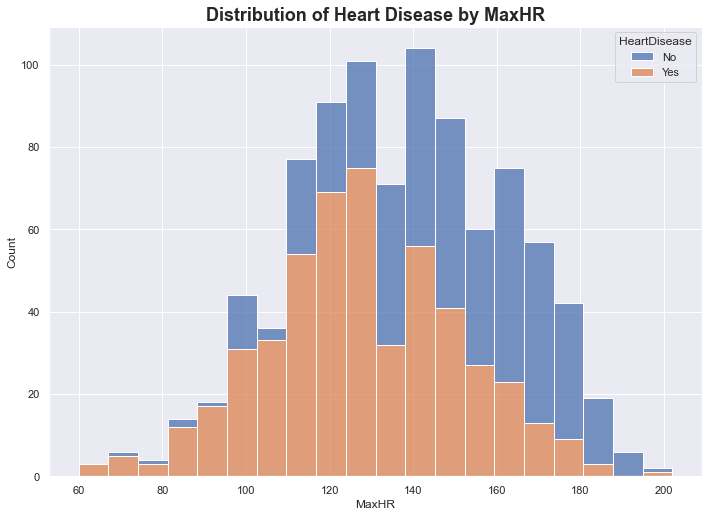

In [40]:
ax = sns.histplot(df, x='MaxHR',hue='HeartDisease', multiple='stack')
ax.set_title('Distribution of Heart Disease by MaxHR', fontsize=18, fontweight='bold')

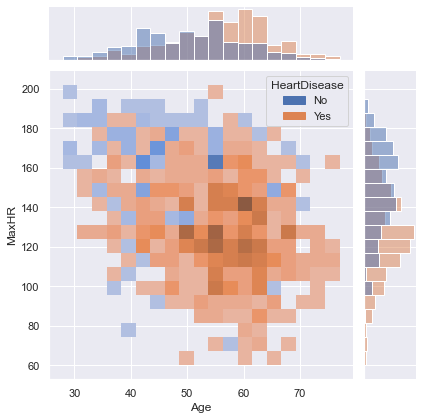

In [41]:
sns.jointplot(data=df, x='Age', y='MaxHR', hue = 'HeartDisease', kind="hist")

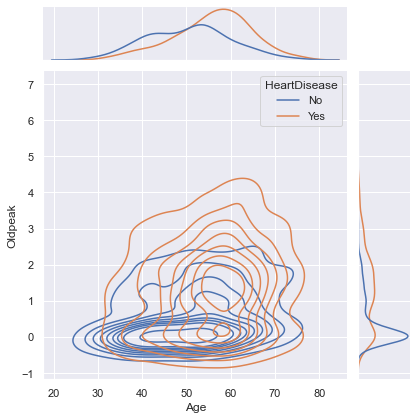

In [42]:
sns.jointplot(data=df, x='Age', y='Oldpeak', hue = 'HeartDisease', kind = 'kde')

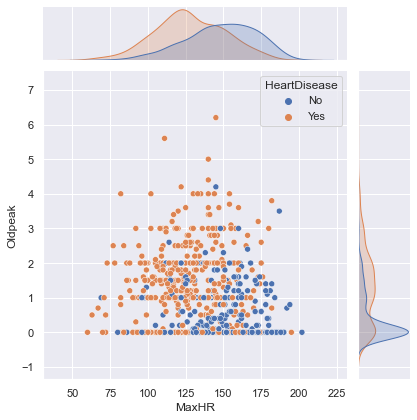

In [43]:
sns.jointplot(data=df, x='MaxHR', y='Oldpeak', hue = 'HeartDisease', kind = 'scatter')

In [44]:
#Low MAX HR
#Older age
#ATA chest pain type
#Male gender
#High cholester